In [201]:
from pymatgen import Structure
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure as bs
import numpy as np
with MPRester("wxZbXC20FoNcfWQR") as m:
    bands= m.get_bandstructure_by_material_id("mp-9365", True)    

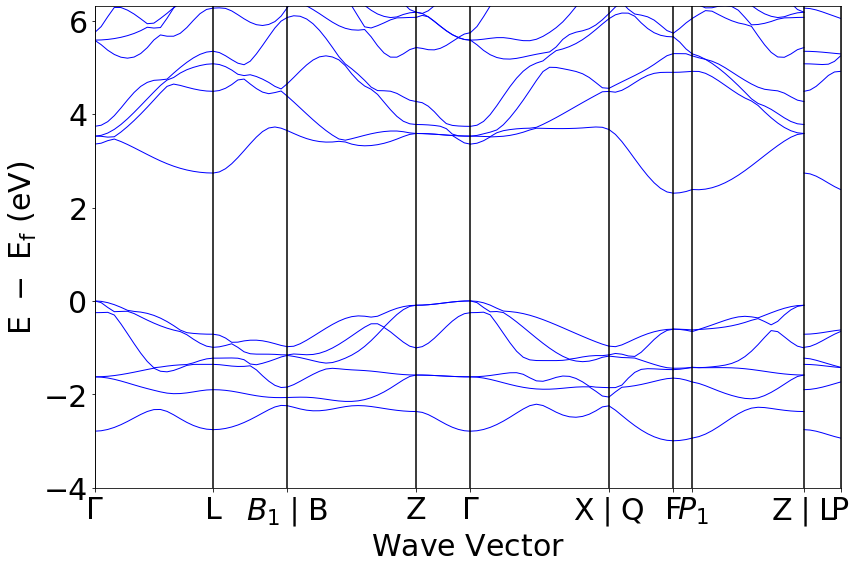

In [202]:
bplot=plotter.BSPlotter(bands)
print("Diagramme de la structure de bande:")
bplot.show()

In [220]:
bg=bands.get_band_gap()
print("La bande interdite de cette structure est:")
print(bg)
print("")
print("Cette bande montre que le matériau peut être utilisé comme semi-conducteur. Il y a malgré tout une transition indirecte qui rend la conductivité moins aisé.")

La bande interdite de cette structure est:
{'direct': False, 'energy': 2.3064, 'transition': '\\Gamma-F'}

Cette bande montre que le matériau peut être utilisé comme semi-conducteur. Il y a malgré tout une transition indirecte qui rend la conductivité moins aisé.


In [204]:
data=bplot.bs_plot_data()
label=data.get('ticks').get('label')
#détermination de l'index de la première bande de conduction
E=data.get('energy')
for i in range(0,len(E[0].get('1'))):
    if E[0].get('1')[i][0]>2.0:
        cond=i
        break

#création du vecteur branche (en enlevant les redondances)
line_index=np.array([0,1,3,4,6,8,9,11,13,14])
l=len(line_index)

#calcul des distances entre lignes mitoyennes
d=np.zeros(l)
dist=np.zeros(l-1)
d[0]=data.get('ticks').get('distance')[0]
for i in range(1,l):
    d[i]=data.get('ticks').get('distance')[line_index[i]]
    dist[i-1]=d[i]-d[i-1]

#calcul de la différence d'énergie entre lignes mitoyennes, pour la 1ère bande de conduction et la dernière bande de valence
diffEval=np.zeros(l-1)
diffEcond=np.zeros(l-1)
for i in range(0,l-1):
    diffEval[i]=E[i].get('1')[cond-1][-1]-E[i].get('1')[cond-1][0]
    diffEcond[i]=E[i].get('1')[cond][-1]-E[i].get('1')[cond][0]

In [205]:
#calcul des pentes entre lignes mitoyennes, pour la 1ère bande de conduction et la dernière bande de valence
penteval=np.zeros(l-1)
pentecond=np.zeros(l-1)
for i in range(0,l-1):
    penteval[i]=np.abs(diffEval[i])/dist[i]
    pentecond[i]=np.abs(diffEcond[i])/dist[i]

In [206]:
maxval=np.amax(penteval)
i1=np.where(penteval == maxval)[0][0]
print("La dernière bande de valence possède une dispersion maximale de:")
print(maxval)
print("Cette dispersion se trouve dans la direction \u0393 - X|Q")
print("")

minval=np.amin(penteval)
i2=np.where(penteval == minval)[0][0]
print("La dernière bande de valence possède une dispersion minimale de:")
print(minval)
print("Cette dispersion se trouve dans la direction F - P1")
print("")

maxcond=np.amax(pentecond)
i3=np.where(pentecond == maxcond)[0][0]
print("La première bande de conduction possède une dispersion maximale de:")
print(maxcond)
print("Cette dispersion se trouve dans la direction X|Q - F")
print('')

mincond=np.amin(pentecond)
i4=np.where(pentecond == mincond)[0][0]
print("La première bande de conduction possède une dispersion minimale de:")
print(mincond)
print("Cette dispersion se trouve dans la direction B1|B - Z")
print('')

La dernière bande de valence possède une dispersion maximale de:
0.9261563075948795
Cette dispersion se trouve dans la direction Γ - X|Q

La dernière bande de valence possède une dispersion minimale de:
0.12206901542516936
Cette dispersion se trouve dans la direction F - P1

La première bande de conduction possède une dispersion maximale de:
2.803144377164779
Cette dispersion se trouve dans la direction X|Q - F

La première bande de conduction possède une dispersion minimale de:
0.0639227207726754
Cette dispersion se trouve dans la direction B1|B - Z



In [207]:
x=np.asarray(data.get('distances')[0])
for i in range(1,len(data.get('distances'))):
    x=np.append(x,np.asarray(data.get('distances')[i]))
    
Ev=np.asarray(E[0].get('1')[cond-1])
Ec=np.asarray(E[0].get('1')[cond])
for i in range(1,l-1):
    Ev=np.append(Ev,np.asarray(E[i].get('1')[cond-1]))
    Ec=np.append(Ec,np.asarray(E[i].get('1')[cond]))

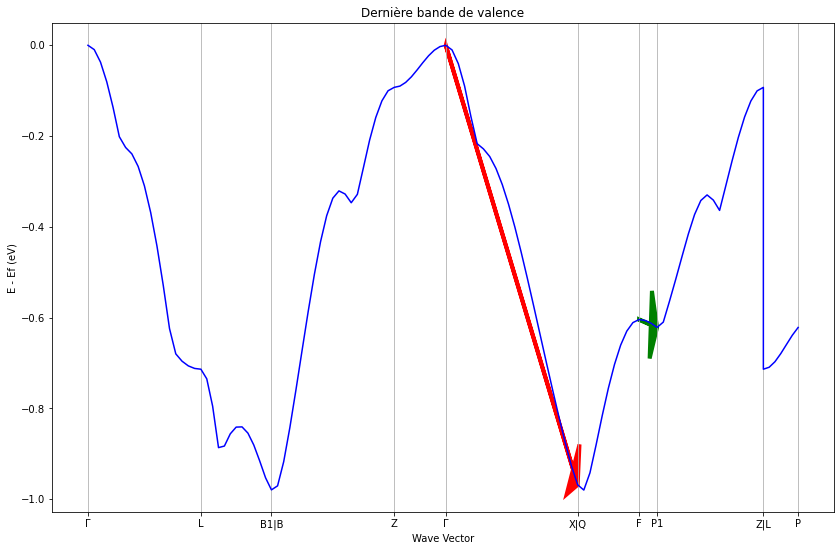

In [208]:
fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(x, Ev, "b-")
plt.arrow(d[i1], (E[i1].get('1')[cond-1])[0], dist[i1], diffEval[i1], head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)
plt.arrow(d[i2], (E[i2].get('1')[cond-1])[0], dist[i2], diffEval[i2], head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(d)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Dernière bande de valence')
axes = plt.gca()
axes.xaxis.grid()

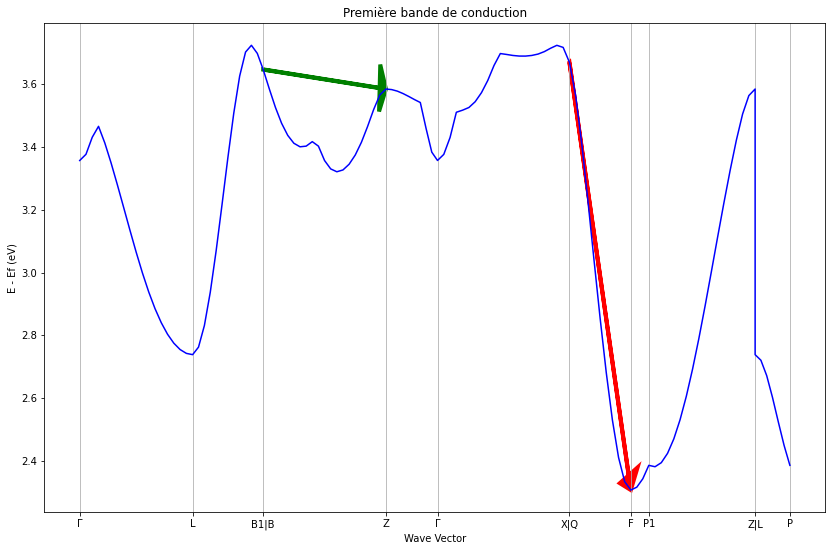

In [209]:
fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(x, Ec, "b-")
plt.arrow(d[i3], (E[i3].get('1')[cond])[0], dist[i3], diffEcond[i3], head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)
plt.arrow(d[i4], (E[i4].get('1')[cond])[0], dist[i4], diffEcond[i4], head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(d)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Première bande de conduction')
axes = plt.gca()
axes.xaxis.grid()

Pour la dernière bande de valence, on a un maximum en : (k1,E1) = ( 2.8359976865510084 , 0.0 )
Il faut noter que cette valeur maximale de E apparaît 3 fois sur la bande. On choisit ici arbitrairement le point correspondant au dernier maximum.
Il faut choisir un autre point pour réaliser la parabole. En vu de la forme de la bande,on choisit un point se trouvant un peu à droite sur la même branche : (k2,E2) = ( 2.985386222388234 , -0.08999999999999986 )
 
On trouve finalement comme équation:
f(k) =  -4.032811918548189 *(k- 2.8359976865510084 )^2


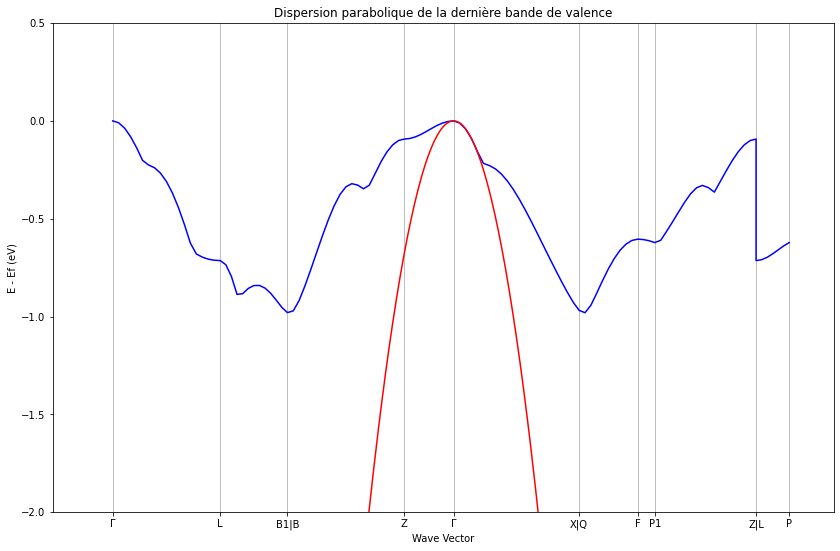

In [214]:
A = 10**(-10)
eV = 1.602176563*10**(-19)
hbar = 1.054571818*10**(-34)

index=np.where(Ev == np.amax(Ev))[0][-1]
k1,k2=x[index],x[index+3]
E1,E2=Ev[index],Ev[index+3]
print("Pour la dernière bande de valence, on a un maximum en : (k1,E1) = (",k1,",",E1,")")
print("Il faut noter que cette valeur maximale de E apparaît 3 fois sur la bande. On choisit ici arbitrairement le point correspondant au dernier maximum.")
print("Il faut choisir un autre point pour réaliser la parabole. En vu de la forme de la bande,on choisit un point se trouvant un peu à droite sur la même branche : (k2,E2) = (",k2,",",E2,")")
a = E2/(k2-k1)**2

print(" ")
print("On trouve finalement comme équation:")
print("f(k) = ", a, "*(k-", k1,")^2")

def f(z):
    return a*(z-k1)**2

z = np.arange(2.0,4.0,0.01)
y=f(z)


fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(x, Ev, "b-")
plt.plot(z,y,'r')
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(d)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Dispersion parabolique de la dernière bande de valence')
axes = plt.gca()
axes.xaxis.grid()
plt.xlim(-0.5,6.0)
plt.ylim(-2,0.5)
plt.show()

In [215]:
print("On trouve alors la dérivée seconde de cette dispersion: E''=",2*a," eV*A^2 (A pour Angstrom)")
fsec=2*a
ftot=fsec*(A**2)*eV
print("Cela donne E''=",ftot,"J*m^2")
print("")
meff=(hbar**2)/ftot
print("La masse effective au sommet de la dernière bande de valence est donc m*=",meff," kg")

On trouve alors la dérivée seconde de cette dispersion: E''= -8.065623837096378  eV*A^2 (A pour Angstrom)
Cela donne E''= -1.292255347776995e-38 J*m^2

La masse effective au sommet de la dernière bande de valence est donc m*= -8.60605236598908e-31  kg


Pour la première bande de conduction, on a un minimum en : (k1,E1) = ( 4.36824256359276 , 2.3064 )
Il faut choisir un autre point pour réaliser la parabole. En vu de la forme de la bande,on choisit un point se trouvant un peu à gauche sur la même branche : (k2,E2) = ( 4.222285037996366 , 2.5298 )
 
On trouve finalement comme équation:
f(k) =  10.486490901486976 *(k- 4.36824256359276 )^2+ 2.3064


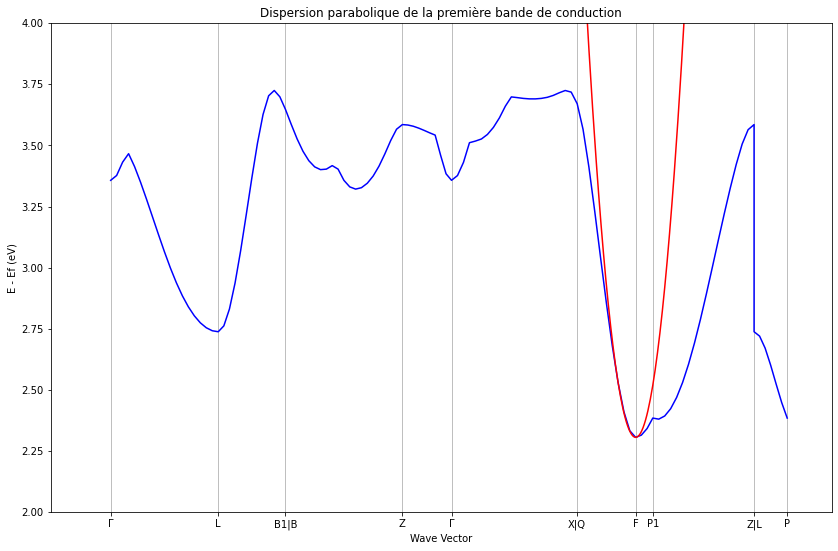

In [216]:
index=np.where(Ec == np.amin(Ec))[0][0]
k1,k2=x[index],x[index-3]
E1,E2=Ec[index],Ec[index-3]
print("Pour la première bande de conduction, on a un minimum en : (k1,E1) = (",k1,",",E1,")")

print("Il faut choisir un autre point pour réaliser la parabole. En vu de la forme de la bande,on choisit un point se trouvant un peu à gauche sur la même branche : (k2,E2) = (",k2,",",E2,")")
a = (E2-E1)/(k2-k1)**2

print(" ")
print("On trouve finalement comme équation:")
print("f(k) = ", a, "*(k-", k1,")^2+",E1)

def f(z):
    return a*(z-k1)**2+E1

z = np.arange(3.0,5.0,0.01)
y=f(z)


fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(x, Ec, "b-")
plt.plot(z,y,'r')
x_label_list = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(d)
ax.set_xticklabels(x_label_list)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Dispersion parabolique de la première bande de conduction')
axes = plt.gca()
axes.xaxis.grid()
plt.xlim(-0.5,6.0)
plt.ylim(2,4)
plt.show()

In [217]:
print("On trouve alors la dérivée seconde de cette dispersion: E''=",2*a," eV*A^2 (A pour Angstrom)")
fsec=2*a
ftot=fsec*(A**2)*eV
print("Cela donne E''=",ftot,"J*m^2")
print("")
meff=(hbar**2)/ftot
print("La masse effective à la base de la première bande de conduction est donc m*=",meff," kg")

On trouve alors la dérivée seconde de cette dispersion: E''= 20.97298180297395  eV*A^2 (A pour Angstrom)
Cela donne E''= 3.360241990095035e-38 J*m^2

La masse effective à la base de la première bande de conduction est donc m*= 3.309647705724824e-31  kg
